[1.32744902 1.30639588 1.30538737 1.39333378 1.4608071  1.48202431
 1.56718804 1.64217027 1.77569913 1.88323924 2.20148099]
[0.97649289 0.95747926 0.9779137  1.02246288 1.0895469  1.11438446
 1.17025243 1.23448212 1.34445665 1.42375114 1.66051348]
[0.94369982 0.9454345  0.94139622 0.97906134 1.03086769 1.061348
 1.12353657 1.17438208 1.27258023 1.35698813 1.57667643]


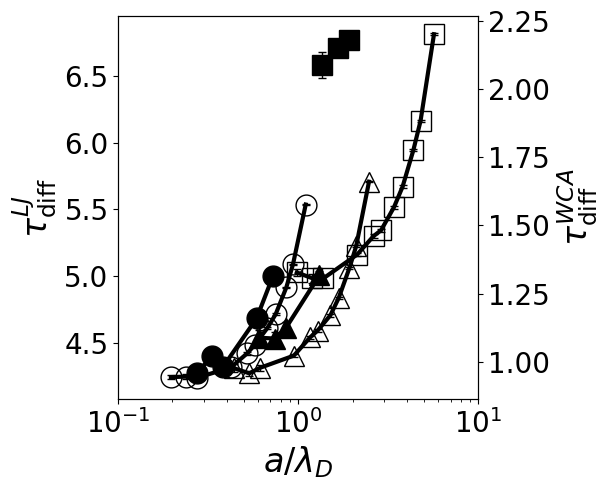

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "./"

# ---------- Load x-data ---------- #
x_df = pd.read_csv(f"{file_path}a_lambda_d.csv")

# ---------- Load Dpp, Dmm from new files ---------- #
def load_dpp_dmm(eps, model):
    fname = f"{file_path}Diffusion_fit_LD_{eps}_{model}.csv"
    df = pd.read_csv(fname)

    D_cat = df["Dpp"].values          # D++
    D_cat_err = df["Dpp_err"].values
    D_ani = df["Dmm"].values          # D--
    D_ani_err = df["Dmm_err"].values

    return D_cat, D_cat_err, D_ani, D_ani_err

# ---------- τ_diff function ---------- #
def tau_diff(D_cat, D_ani, err_cat, err_ani, sigma=1.5):
    D_cat, D_ani = np.array(D_cat), np.array(D_ani)
    err_cat, err_ani = np.array(err_cat), np.array(err_ani)

    D_salt = 0.5 * (D_cat + D_ani)
    tau = sigma**2 / (6.0 * D_salt)

    D_salt_err = np.sqrt((0.5 * err_cat)**2 + (0.5 * err_ani)**2)
    tau_err = (sigma**2 / 6.0) * (D_salt_err / (D_salt**2))

    return tau, tau_err


# ---------- Compute τ_diff for all LJ/WCA ---------- #
tau_mean, tau_err = {}, {}

for eps in ['0.2', '1', '5']:
    key = eps.replace('.', '')

    # LJ
    D_cat, D_cat_err, D_ani, D_ani_err = load_dpp_dmm(eps, "LJ")
    tau_mean[f"{key}_lj"], tau_err[f"{key}_lj"] = tau_diff(D_cat, D_ani, D_cat_err, D_ani_err)

    # WCA
    D_cat, D_cat_err, D_ani, D_ani_err = load_dpp_dmm(eps, "WCA")
    tau_mean[f"{key}_wca"], tau_err[f"{key}_wca"] = tau_diff(D_cat, D_ani, D_cat_err, D_ani_err)


# ---------- Plot settings ---------- #
color_map = {'0.2': 'black', '1': 'black', '5': 'black'}
marker_map = {'0.2': 's', '1': '^', '5': 'o'}

fig, ax_l = plt.subplots(figsize=(6.2,5))
ax_r = ax_l.twinx()

# ---------- LJ ---------- #
for eps in ['0.2', '1', '5']:
    key = eps.replace('.', '')
    x_vals = x_df[f"{eps}_LJ"]
    y_vals = tau_mean[f"{key}_lj"]
    y_err = tau_err[f"{key}_lj"]

    ax_l.plot(x_vals, y_vals, color=color_map[eps], linewidth=3)
    ax_l.errorbar(
        x_vals, y_vals, yerr=y_err,
        fmt=marker_map[eps], color=color_map[eps],
        mfc=color_map[eps], mec=color_map[eps], markersize=15,
        elinewidth=1, capsize=3, label=f"{eps} LJ"
    )

# ---------- WCA ---------- #
for eps in ['0.2', '1', '5']:
    key = eps.replace('.', '')
    x_vals = x_df[f"{eps}_WCA"]
    y_vals = tau_mean[f"{key}_wca"]
    y_err = tau_err[f"{key}_wca"]

    ax_r.plot(x_vals, y_vals, color=color_map[eps], linewidth=3)
    ax_r.errorbar(
        x_vals, y_vals, yerr=y_err,
        fmt=marker_map[eps], color=color_map[eps],
        mfc='none', mec=color_map[eps], markersize=15,
        elinewidth=1, capsize=3, label=f"{eps} WCA"
    )
    print(y_vals)
# ---------- Axis styling ---------- #
ax_l.set_xlabel(r'${a}/{\lambda_D}$', fontsize=24)
ax_l.set_ylabel(r'$\tau_{\mathrm{diff}}^{LJ}$', fontsize=24)
ax_r.set_ylabel(r'$\tau_{\mathrm{diff}}^{WCA}$', fontsize=24)

ax_l.set_xscale("log")
ax_l.set_xlim(0.1,10)
ax_l.tick_params(axis='both', labelsize=20)
ax_r.tick_params(axis='y', labelsize=20)

plt.tight_layout()
plt.show()